<a href="https://colab.research.google.com/github/sichan0107/Data_Analysis/blob/master/ozone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving airquality.csv to airquality.csv
Saving VOCs-NOx.csv to VOCs-NOx.csv


In [2]:
# 데이터 불러오기 
import io
import pandas as pd

df_air = pd.read_csv(io.StringIO(uploaded['airquality.csv'].decode('utf-8')))
df_vocs = pd.read_csv(io.StringIO(uploaded['VOCs-NOx.csv'].decode('utf-8')))

In [6]:
print(df_air)
print('==========================')
print(df_vocs)

     월        O3   temp  wind  hume   rain
0    1  0.634515   1.16   2.1   NaN   60.5
1    2  0.839108   2.50   2.3  58.0   53.1
2    3  1.248780   7.70   2.5  46.3   16.3
3    4  1.277590  11.10   3.0  50.0   16.9
4    5  1.874740  18.00   2.4  67.3  112.4
5    6  1.721930  24.90   2.3  67.4  139.6
6    7  1.393300  24.10   2.4  76.3  270.4
7    8  1.386960  26.50   2.3  85.1  675.7
8    9  1.023190  21.40   2.5  70.8  181.5
9   10  0.899659  14.30   2.1  60.4    0.0
10  11  0.612064   8.00   2.3  63.7  120.1
11  12  0.576422  -0.40   2.2  57.8    4.6
     월   O3(ppm)  Nox(ppb)  VOCx(ppb)
0    1  0.634515     0.056       38.2
1    2  0.839108     0.050       33.3
2    3  1.248780     0.037       26.1
3    4  1.277590     0.025       18.8
4    5  1.874740     0.024       20.0
5    6  1.721930     0.023       20.3
6    7  1.393300     0.020       19.2
7    8  1.386960     0.020       18.8
8    9  1.023190     0.020       18.3
9   10  0.899659     0.036       26.0
10  11  0.612064     0.

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np
#x = np.array(df_air[['temp', 'wind', 'hume', 'rain']])
#z = np.array(df_vocs[['Nox(ppb)','VOCx(ppb)']])

df_air.dropna(axis=0)
#x = df_air[['temp', 'wind', 'hume', 'rain']]


#x = df_air[['temp', 'wind', 'rain']]
x = df_vocs[['Nox(ppb)','VOCx(ppb)']]

#x = df_air[['temp', 'wind', 'hume', 'rain']] + df_vocs[['Nox(ppb)','VOCx(ppb)']]
y = df_air[['O3']]
print(x)
print('============================')
print(y)

    Nox(ppb)  VOCx(ppb)
0      0.056       38.2
1      0.050       33.3
2      0.037       26.1
3      0.025       18.8
4      0.024       20.0
5      0.023       20.3
6      0.020       19.2
7      0.020       18.8
8      0.020       18.3
9      0.036       26.0
10     0.049       34.0
11     0.054       32.2
          O3
0   0.634515
1   0.839108
2   1.248780
3   1.277590
4   1.874740
5   1.721930
6   1.393300
7   1.386960
8   1.023190
9   0.899659
10  0.612064
11  0.576422


In [32]:
# 데이터 분리하기 (정확도를 위해 학습 데이터, 시험 데이터를 8:2로 분리)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [33]:
# 학습데이터를 가지고 선형회귀분석 모델 구현 

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [34]:
# 위에서 테스트 데이터로 예측했던 정보를 시험 데이터와 비교하기 위해 y_predict 변수 선언
y_predict = mlr.predict(x_test)

print(mlr.score(x_train, y_train)) # 학습 모델의 정확도 출력 -> 0.xx로 나오면 xx% 로 읽음

0.7248834682831597


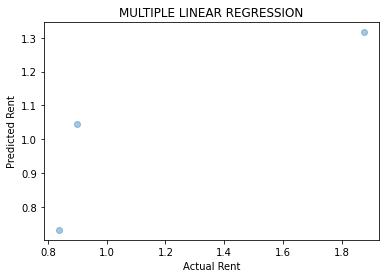

In [35]:
# 선형회귀의 결과를 시각화 그래프로 표현
# X축은 실제 데이터, Y축은 선형회귀로 예측한 데이터이다.
# 두 결과가 같다면 한 줄의 선으로 그려진다.

import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()